# Prediction using Unsupervised ML
### From the given ‘Iris’ dataset, predict the optimum number of clusters
by Prathamesh Kadam

### **IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.spatial.distance import cdist

### **Read the Data**

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### **Clean the Data**

In [5]:
iris_df=df.drop('Id',axis=1)

In [6]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris=iris_df.drop('Species',axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **Exploratory Data Analysis**

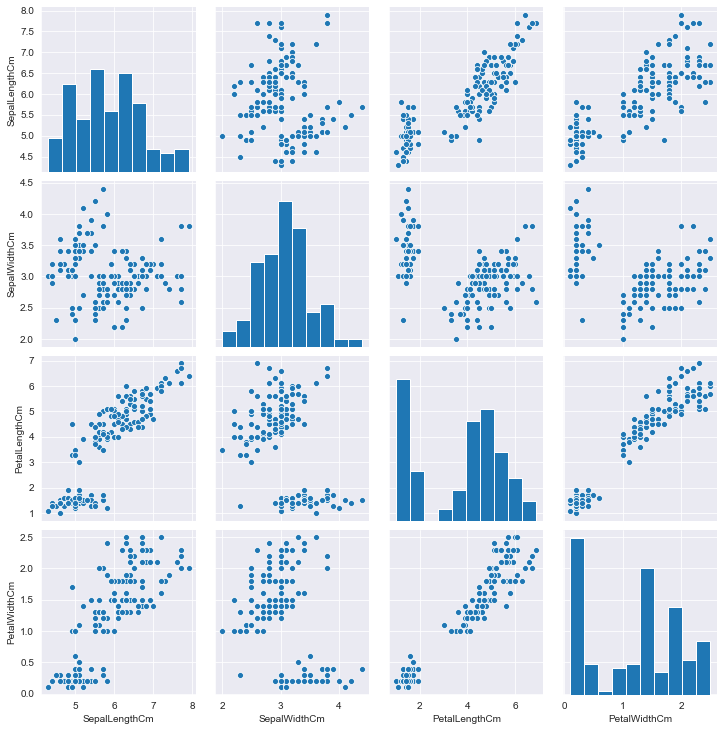

In [8]:
sns.set_style('darkgrid')
sns.pairplot(iris,diag_kind='hist',palette='Set2')

It can be seen from the graphs that there are atleast 2 distinct clusters. Petal width against sepal length or sepal width suggest there is a possibility of 3rd cluster.

### **Model Training**

In [9]:
from sklearn.cluster import KMeans

In [10]:
# Finding optimum number of clusters through Elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(iris)
    kmeanModel.fit(iris)
    distortions.append(sum(np.min(cdist(iris, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / iris.shape[0])

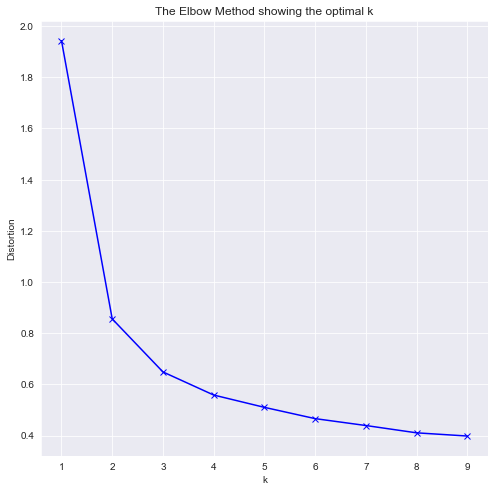

In [11]:
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

There is significant decrease from 1 to 3 K value. The difference in distortion values for 3 and 4 is relatively not that much. Hence optimum number of clusters is 3.

In [12]:
kmeans = KMeans(n_clusters=3)

In [13]:
kmeans.fit(iris)

KMeans(n_clusters=3)

In [14]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### **Prediction and Model evaluation**

Note: Unsupervised algorithm can't be verified as the data is unkown, but for sake of checking correctness of model we are evaluating the model by plotting first 2 features.

In [15]:
predictions = kmeans.fit_predict(iris)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

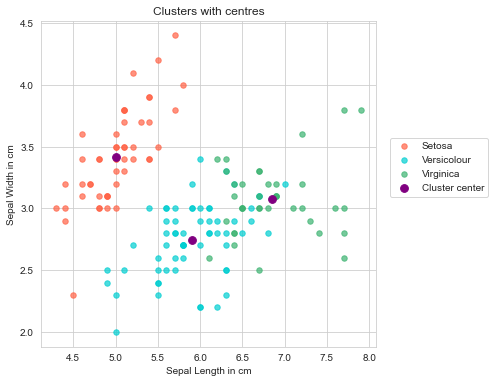

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.title('Clusters with centres')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.scatter(iris[predictions == 1]['SepalLengthCm'], iris[predictions == 1]['SepalWidthCm'],s = 30, color='tomato',alpha=0.7, label = 'Setosa')
plt.scatter(iris[predictions == 0]['SepalLengthCm'], iris[predictions == 0]['SepalWidthCm'],s = 30, color= 'darkturquoise',alpha=0.7, label = 'Versicolour')
plt.scatter(iris[predictions == 2]['SepalLengthCm'], iris[predictions == 2]['SepalWidthCm'],s = 30, color= 'mediumseagreen',alpha=0.7, label = 'Virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 60, color= 'purple', label = 'Cluster center')
plt.legend(loc='center right',bbox_to_anchor=(1,0.5,0.35,0.1))